In [1]:
from logical import *
GRAPH = "../data/graphs/microtexts/nodeset6361.json"
OUTPUT = "../data/similarity_change_for_nodechange/"

In [4]:
import arguebuf as ab
def swap_schema_node(graph: ab.Graph, node_id: str):
    node = graph.nodes[node_id]
    incoming = [node for node in graph.incoming_nodes(node_id)]
    outgoing = [node for node in graph.outgoing_nodes(node_id)]
    print(incoming, outgoing)
    new_node = ab.SchemeNode(ab.Attack.DEFAULT) if node.label == 'Support' else ab.SchemeNode(ab.Support.DEFAULT)
    graph.remove_node(node)
    graph.add_node(new_node)
    for node in incoming:
        graph.add_edge(ab.Edge(node, new_node))
    for node in outgoing:
        graph.add_edge(ab.Edge(new_node, node))

sample_graph = ab.load.file(GRAPH)
variation_nodes = [sample_graph.nodes[node] for node in sample_graph.scheme_nodes]
print(variation_nodes)
for node in variation_nodes:
    sample_graph = ab.load.file(GRAPH)
    swap_schema_node(sample_graph, node.id)
    o = f"{OUTPUT}/sample_graph_altered_{node.id}_logical.png"
    render(sample_graph, o, dpi=300)

[SchemeNode(119932, Attack, Default), SchemeNode(119933, Support, Default), SchemeNode(119934, Attack, Default)]
[AtomNode(119927, Yes, it's annoying and cumbersome to separate your rubbish properly all the time.), SchemeNode(119934, Attack, Default)] [AtomNode(119931, We Berliners should take the chance and become pioneers in waste separation!)]
[AtomNode(119928, Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.)] [AtomNode(119927, Yes, it's annoying and cumbersome to separate your rubbish properly all the time.)]
[AtomNode(119930, and too many resources are lost when what actually should be separated and recycled is burnt.), AtomNode(119929, But still Germany produces way too much rubbish)] [SchemeNode(119932, Attack, Default)]


{'119927': AtomNode(119927, Yes, it's annoying and cumbersome to separate your rubbish properly all the time.), '119928': AtomNode(119928, Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.), '119929': AtomNode(119929, But still Germany produces way too much rubbish), '119930': AtomNode(119930, and too many resources are lost when what actually should be separated and recycled is burnt.), '119931': AtomNode(119931, We Berliners should take the chance and become pioneers in waste separation!), '119932': SchemeNode(119932, Attack, Default), '119933': SchemeNode(119933, Support, Default), '119934': SchemeNode(119934, Attack, Default)}


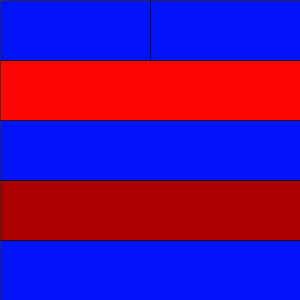

In [7]:
from PIL import Image
sample_graph = ab.load.file(GRAPH)
print(sample_graph.nodes)
node = sample_graph.nodes['119933']
node2 = sample_graph.nodes['119928']
sample_graph.remove_node(node)
sample_graph.remove_node(node2)
render(sample_graph, f"{OUTPUT}/sample_graph_r1_logical.png", dpi=300)
Image.open(f"{OUTPUT}/sample_graph_r1_logical.png")

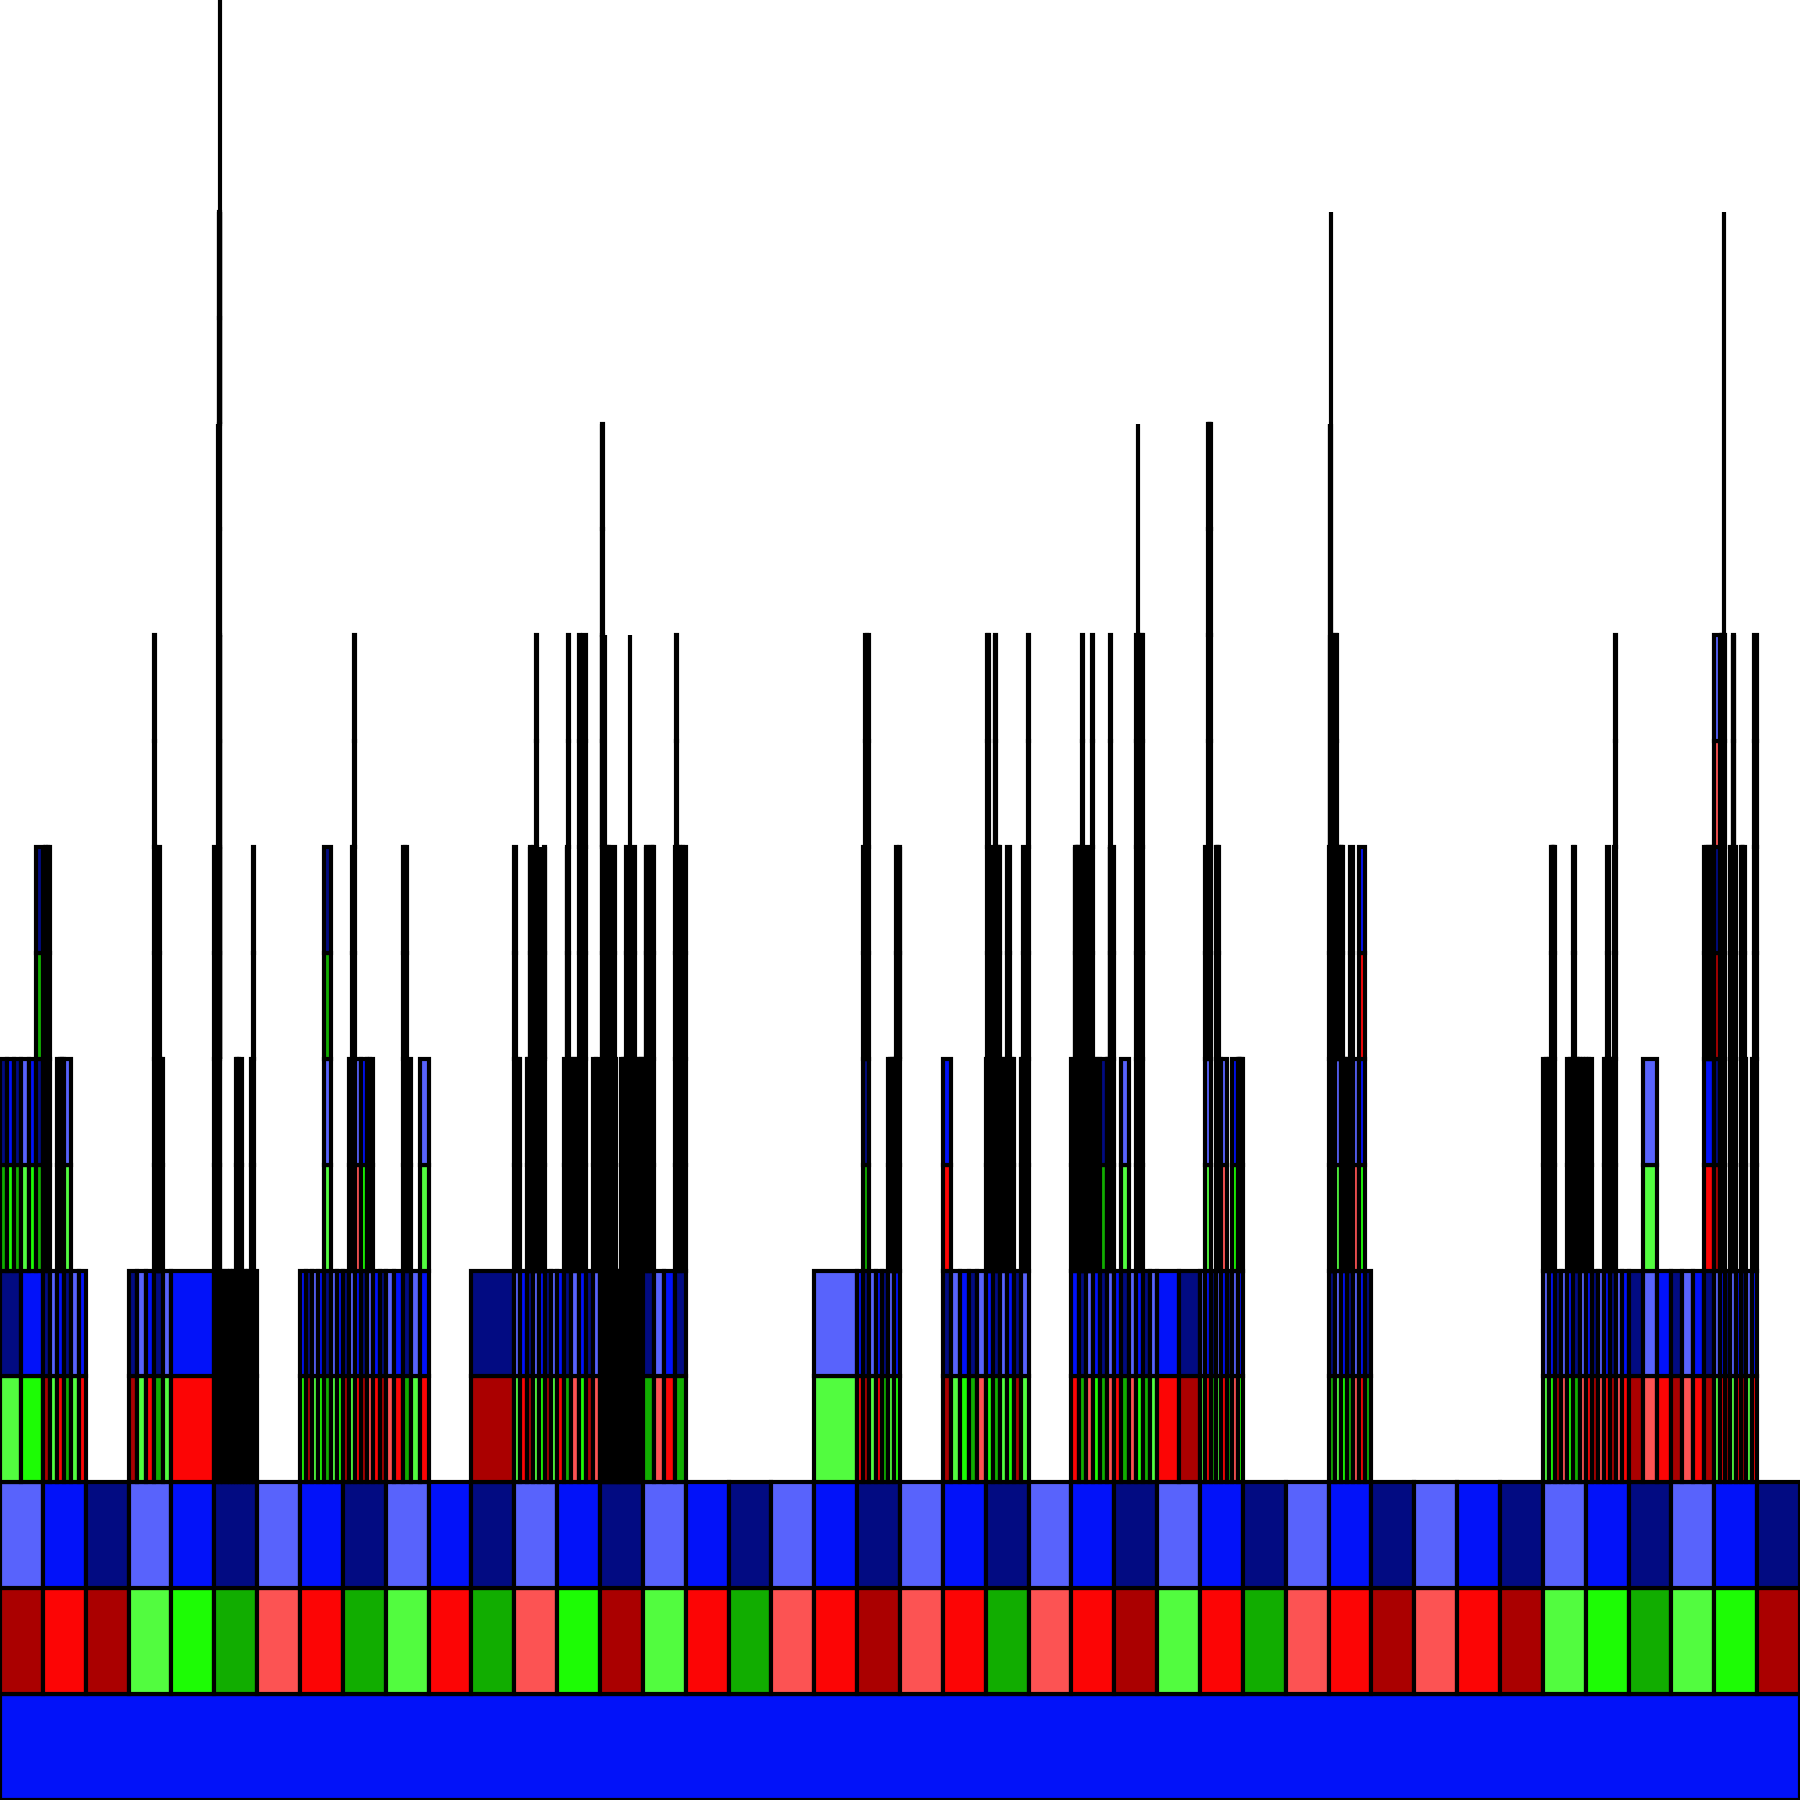

In [17]:
# complex
g = "../data/graphs/kialo-graphnli/4401.json"
sample_graph = ab.load.file(g)
render(sample_graph, f"{OUTPUT}/huge_logical.png", dpi=300)
Image.open(f"{OUTPUT}/huge_logical.png")

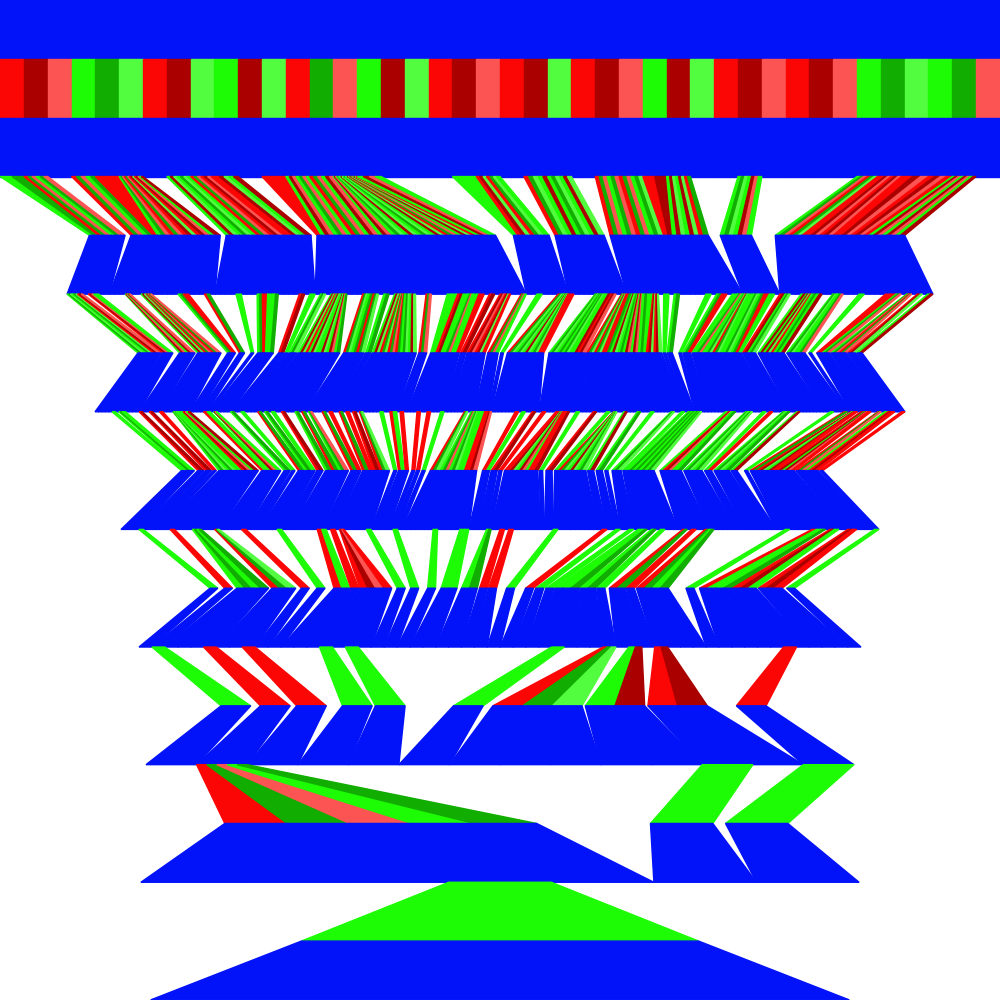

In [16]:
# complex
from srip import SRIP2, default_weight, convert_from_AbstractNode_to_Node
from util import find_major_claim
root = convert_from_AbstractNode_to_Node(sample_graph, find_major_claim(sample_graph))
print(root)
SRIP2(root, sample_graph, f"{OUTPUT}/huge_srip.png", default_weight)
Image.open(f"{OUTPUT}/huge_srip.png")

In [18]:
# medium
sample_graph = "../data/graphs/kialo-graphnli/8678.json"
sample_graph = ab.load.file(sample_graph)
render(sample_graph, f"{OUTPUT}/medium_logical.png", dpi=300)

In [21]:
ab.render.graphviz(ab.dump.graphviz(sample_graph), f"{OUTPUT}/medium.png")
ab.render.graphviz(ab.dump.graphviz(ab.load.file(GRAPH)), f"{OUTPUT}/basegraph.png")

In [22]:
render(ab.load.file(GRAPH), f"{OUTPUT}/basegraph_logical.png", dpi=300)